<a href="https://colab.research.google.com/github/junauh/travel-cost/blob/master/BeachDestination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lead question: Where to go for this SUMMER- Beer & Beach (BnB) Destinations

## Overview

This post series will resolve the travel planning frustration by building an affordable beach destination curation tool using machine learning. We will start by building a travel destination recommendation tool. And discuss further on which algorithm and database to build to machine learn the tool.

## Background

Have you ever felt so frustrated while planning a vacation? Starting from where to go, when to go, how to go,… you feel exhausted and confused by choice overload. Well, you are not alone. According to McKinsey's recent clickstream studies, a customer takes 36 days over 45 touchpoints on average to purchase a single hotel night hopping between search engines to intermediaries to suppliers over multiple devices! Exhausting JUST take me somewhere, ANYWHER!

In this post series, we resolve the frustration by building a affordable beach destination curation tool using machine learning. We will start by building a direct flight travel destination recommendation tool. And discuss further on which algorithm and database to build to machine learn the tool.

## Initial Questions to answer where to go
* When to go? June, July or August?
* How long? 1 week, 10 days or 2 weeks?
* What to do? Fish, Scuba, Sail, Surf, or NOTHING but Beer?

## Model Formalization
* Inputs<br>
  1) home_airports - fetch nearby airports via GPS
  2) Duration
* ML curation inputs<br>
  1) Dates/Months of travel
  2) Duration
  3) One- way travel time [minutes] / Whole trip length [days]
  4) Nights / city
  5) Budget
  6) Companion size
  7) Keen activities
* Assumptions
  1) One- way travel time [minutes] and Whole trip length [days] Correlation
  2) Maximum Budget per person per day
  3) 

## Sample Modeling Inputs
 Based on 6 vacation sample of an customer history, design the personalized summer holiday vacation plan for the customer<br>
  1) Home airport: MMX or CPH<br>
  2) Avg. 25 minutes flight one-way per travel day<br>
  3) Avg. 4 days per city<br>
  4) Mostly traveled in June<br>
  5) Budet: total 20,000 sek for 2 people

## Tool input
home_airport1 = 'MMX'
home_airport2 = 'CPH'
month = 'june'
vacation_length_day = 14
max_flight_time_per_travel_day_min = 25

## Data Sources

## Notable Issues/Filters - Geographical renamming issues

1 .Frontal Variation
- corfu vs. korfu
- busan vs pusan
- Kyongju vs. Gyongju
- Taegu vs. Daegu
- Taejon vs. Daejeon

2 .End point Variation
- Malmö vs. Malmoe
- Inchon vs. Incheon

3 .New vs. old names
- Peking → Beijing
- Bombay → Mumbai
- Madras → Chennai
- Burma → Myanmmar
- Canton → Guangdong
- Nanking → Nanjing (#2)
- Sian → Xi'an (#1)
- Chengtu → Chengdu (#2)
- Chungking → Chongqing (#2)
- Tientsin → Tianjin
- Sinkiang → Xinjiang
- Heilungkiang → Heilongjiang (#2)
- Saigon → Ho Chi Minh City
- FYROM → Maccedonia

4 .Same name different country under romanization
- Straßburg (Germany) vs Strasbourg (France)

Ref
https://en.wikipedia.org/wiki/Geographical_renaming

## Future improvements
* Geographical renaming only applies to city names, not countries like Burma → Myanmmar or FYROM → Maccedonia
* Web scraping legal issues
* ML model building
* Incorporate more transportation option - train, bus, car sharing
*IP address/ Location based service
: automatically search nearby airport(s)
: filter out your visa status
* Email scraping for automatic ML
*Dream: voice travel search - send visuals to mobile - voice purchase
* Real time price comparison- study jack's flight method
* Accomodation

#**dictionary vs. datafram
#**visualization of all the data below - i.e. temperature and beer index

Table columns : country, nearby cities, beer price, flight price for the whole trip

*Dream: voice travel search - send visuals to mobile - voice purchase

*Hotel
: digital key


## Import libraries and define inputs

In [0]:
#inputs

home_airport1 = 'MMX'
home_airport2 = 'CPH'
month = 'june'

vacation_length_day = 14
max_flight_time_per_travel_day_min = 25
max_flight_time_one_way = vacation_length_day * max_flight_time_per_travel_day_min

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests

from bs4 import BeautifulSoup
import re


## 1. Find destinations: flight time less than 350 min from CPH and MMX

Webscrape direct flight routes from home airports using "https://www.flightsfrom.com/" as the source webpage. According to the website, CPH and MMX total have 156 direct flights routes.

In [0]:
page_home_airport_1 = requests.get("https://www.flightsfrom.com/{}/destinations?durationFrom=0&durationTo={}".format(home_airport1,max_flight_time_one_way))
page_home_airport_2 = requests.get("https://www.flightsfrom.com/{}/destinations?durationFrom=0&durationTo={}".format(home_airport2,max_flight_time_one_way))
if page_home_airport_1.status_code != 200:
    print('Airport 1 Flight Time page loading Error')
if page_home_airport_2.status_code != 200:
    print('Airport 2 Flight Time page loading Error')


In [0]:
#parse a page with BeautifulSoup: take the raw html text and break it into Python object

soup_one = BeautifulSoup(page_home_airport_1.content,'html.parser')
soup_two = BeautifulSoup(page_home_airport_2.content,'html.parser')
#print organized HTML content
#soupm.prettify()
#soupc.prettify()

In [4]:
#navigate through an HTML document via 'Tag' object
sfam = soup_one.find_all('li', class_=['airport-content-destination-listitem','airport-content-destination-listitem-hidden'])
#find children inside tml tag

direct_flight_destinations = pd.DataFrame(columns = ['Country','City'])

for item in sfam:
    if 'data-name' in item.attrs:
        if 'data-country' in item.attrs:
            direct_flight_destinations = direct_flight_destinations.append({'Country':item['data-country'], 'City' : item['data-name']},ignore_index = True)

direct_flight_destinations.head()

,Country,City
0,Serbia,Beograd
1,Romania,Bucharest
2,Hungary,Budapest
3,Romania,Cluj-Napoca
4,Poland,Gdansk


In [5]:
#navigate through an HTML document via 'Tag' object
sfac = soup_two.find_all('li', class_=['airport-content-destination-listitem','airport-content-destination-listitem-hidden'])

direct_flight_destinations = pd.DataFrame(columns = ['Country','City'])

#find children inside tml tag
for item in sfac:
    if 'data-name' in item.attrs:
        if 'data-country' in item.attrs:
            direct_flight_destinations = direct_flight_destinations.append({'Country':item['data-country'], 'City' : item['data-name']},ignore_index = True)

direct_flight_destinations = direct_flight_destinations.drop_duplicates()
direct_flight_destinations.describe()


,Country,City
count,156,156
unique,50,156
top,Italy,Monastir
freq,13,1


# 2. Beach Destination (Max Water temp > 21 ; Ideally  [25 - 28 C])

Use "https://www.seatemperature.org/" as the source webpage. Water temperature in interest, not air temperature as for each 1 degree c increase in air means between 0.6 - 0.8 d.c increase in water temperature. In order to extract the water temperature per city per month, the following ulrs have to be extracted https://www.weather2visit.com/europe/sweden/malmoe-august.htm

1) for a country from direct_flight_destinations df, create a weather_url dataframe for each city : <br/>https://www.weather2visit.com/africa/{country}/{city}
2) Check if city in direct_flight_destinations is in weather_url <br/>
3-a) if yes, extract he city url and format the url to return city_url of the travel month (i.e. June) <br/>
-i.e. url = 'https://www.weather2visit.com{c}-{m}.htm'.format(c=city_based_on_travel_time,m = month)<br/>
3-b) else check if the alternate names of the city is found in the filtered_cities_url_dict_from_weather_page and extract the city url and format the url to return city_url of the travel month (i.e. June)<br/>
4) Parse and extract cities with 'Warmest sea' value > 21 C<br/>


## If seatemperature web's city name matches city names from direct_flight_destinations, create and update the weather_url dataframe

In [0]:
#fix the 403 access forbidden error by specifying user-agent 

url = 'https://www.weather2visit.com/country-list'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
page_beach = requests.get(url, headers=headers)

if page_beach.status_code != 200:
    print('Water Temperature page loading Error')
    
#prase the HTML document into python object and beautify it
soup_beach = BeautifulSoup(page_beach.content,'html.parser')

In [7]:
#navigate through an soup document via 'Tag' object 'a' to extract all country lists with continent
sbfa = soup_beach.find_all('a')

#find children inside li tag with href attribute
countries_list = [item['href'] for item in sbfa if 'href' in item.attrs]

import re
regex = r'/{3}'
filtered_countries_from_weather_page = []
for item in countries_list:
    #use regular expression to only parsing element with country information - element with 3 '/' i.e. '/africa/burundi/'
    if (len(re.findall('/',item)) == 3):
        country = item.split('/')[2]
        if country.title() in direct_flight_destinations['Country'].unique():
          filtered_countries_from_weather_page.append(item)

countries_url_weather_page = pd.Series(filtered_countries_from_weather_page)
countries_url_weather_page.describe()

count                  41
unique                 41
top       /europe/france/
freq                    1
dtype: object

In [8]:
#ensure only the cities of the specified country is added to dictionary
#loop through countries : https://www.weather2visit.com/africa/algeria/
#create need {country:city_url} dictionary

cities_list = []
weather_url = pd.DataFrame(columns = ['City','City_url'])

for country in filtered_countries_from_weather_page:
    url = 'https://www.weather2visit.com{}'.format(country)
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    page_beach_country_city = requests.get(url, headers=headers)
    soup_beach_country_city = BeautifulSoup(page_beach_country_city.content,'html.parser')   
    
    #navigate through an soup document via 'Tag' object 'a' to extract all country lists with continent
    sbccfa = soup_beach_country_city.find_all('a')
    cities_list = [item['href'] for item in sbccfa if 'href' in item.attrs]
    cities_list = list(set(cities_list))
    
    for c in cities_list:
        pattern = re.compile(country)
        if pattern.match(c):
            cityhtm = c.split('/')[3]
            city = cityhtm.split('.')[0]
            url = c.split('.')[0]
            weather_url = weather_url.append({'City':city.title(), 'City_url' : url},ignore_index = True)

weather_url['City'] = weather_url['City'].drop_duplicates()
weather_url.describe()

,City,City_url
count,1978,1990
unique,1978,1990
top,Erzincan,/europe/ireland/cluain-meala
freq,1,1


## Check if city in direct_flight_destinations is in weather_url <br/>


In [9]:
# url = 'https://www.weather2visit.com{c}-{m}.htm'.format(c=city_based_on_travel_time,m = month)
#https://www.weather2visit.com/europe/sweden/malmoe-august.htm

url = ''
city_june_url = pd.DataFrame(columns = ['City','City_url'])
alt_filtered_cities = pd.DataFrame(columns = ['City','Country'])

#means city and city_u are not the same
for city in direct_flight_destinations['City']: 
    if city in weather_url['City'].unique():
        url = weather_url[weather_url['City'] == city]['City_url'].to_string(index=False)
        url = url.strip()
        city_june_url = city_june_url.append({'City':city, 'City_url' : 'https://www.weather2visit.com{c}-{m}.htm'.format(c=url,m = month)},ignore_index = True)
        print('https://www.weather2visit.com{c}-{m}.htm'.format(c=url,m = month))
    else:
        alt_filtered_cities = alt_filtered_cities.append({'City': city, 'Country': direct_flight_destinations[direct_flight_destinations['City'] == city]['Country']},ignore_index =True)
        
city_june_url.describe()

https://www.weather2visit.com/europe/denmark/aalborg-june.htm
https://www.weather2visit.com/africa/morocco/agadir-june.htm
https://www.weather2visit.com/middle-east/turkey/alanya-june.htm
https://www.weather2visit.com/europe/norway/alesund-june.htm
https://www.weather2visit.com/europe/spain/alicante-june.htm
https://www.weather2visit.com/middle-east/jordan/amman-june.htm
https://www.weather2visit.com/europe/netherlands/amsterdam-june.htm
https://www.weather2visit.com/middle-east/turkey/ankara-june.htm
https://www.weather2visit.com/middle-east/turkey/antalya/-june.htm
https://www.weather2visit.com/middle-east/jordan/aqaba-june.htm
https://www.weather2visit.com/europe/greece/athens-june.htm
https://www.weather2visit.com/middle-east/iraq/baghdad-june.htm
https://www.weather2visit.com/europe/spain/barcelona-june.htm
https://www.weather2visit.com/europe/switzerland/basel-june.htm
https://www.weather2visit.com/europe/france/bastia-june.htm
https://www.weather2visit.com/middle-east/lebanon/be

,City,City_url
count,105,105
unique,105,105
top,Monastir,https://www.weather2visit.com/europe/italy/rom...
freq,1,1


In [10]:
city_june_url.head()

,City,City_url
0,Aalborg,https://www.weather2visit.com/europe/denmark/a...
1,Agadir,https://www.weather2visit.com/africa/morocco/a...
2,Alanya,https://www.weather2visit.com/middle-east/turk...
3,Alesund,https://www.weather2visit.com/europe/norway/al...
4,Alicante,https://www.weather2visit.com/europe/spain/ali...


In [11]:
city_june_url.describe()

,City,City_url
count,105,105
unique,105,105
top,Monastir,https://www.weather2visit.com/europe/italy/rom...
freq,1,1


## For the 51 of the cities with alternate name (no matching weather url), check if the alternate names of the city could be matched to extract cities_url_dict_from_weather_page
- https://www.kaggle.com/geonames/geonames-database
- https://www.kaggle.com/leighplt/country-code
- set ascii name as the index column

In [0]:
#@title
from google.colab import files
uploaded = files.upload()
import io
geo_name = pd.read_csv(io.BytesIO(uploaded['geonames.csv']),header=0,index_col = 'asciiname')
geo_name = geo_name.dropna(subset=['alternatenames'])
geo_name = geo_name[['alternatenames','countryname']]


In [0]:
#@title
#city_based_on_travel format = {city:country} to check if the city name exists within the alternatename list with the 
#matching country name
#print(type(geo_name['alternatenames']))

table_city_alt_names = pd.DataFrame(columns = ['alternatenames','countryname'])
appended_data = []

for city in alt_filtered_cities['City']:
    table_alt_city = geo_name[(geo_name['alternatenames'].str.contains(city))]
    #print(table_alt_city)
    #print(table_city_alt_names)
    appended_data.append(table_city_alt_names)
    
table_city_alt_names = pd.concat(appended_data)
table_city_alt_names.describe()

In [0]:
#@title
table_city_alt_names.head()

In [0]:
#@title
#need to check if city_u is within the altname of the selected cities
#filtered_cities_url_dict_from_weather_page - 'Sibenik': ['/europe/croatia/sibenik.htm']

for city_alt in table_city_alt_names:
    for city_s in city_alt.split(';'):
        if city_s in weather_url['City']:
            url = (filtered_cities_url_dict_from_weather_page[city_s])[0]
            url_c = url.split('.')[0]
            print(url_c)
            city_june_url = city_june_url.append({'City':city_s, 'City_url' : 'https://www.weather2visit.com{c}-{m}.htm'.format(c=url_c,m = month)},ignore_index = True)
    
#max city_within_max_flight_time.keys() - city_june_url.keys(): MMX CPH, June, 350m case: len(city_june_url_alt) = 54
city_june_url.describe()        

In [0]:
#@title
# max city number: 162
#['Beograd', 'Bucharest', 'Budapest', 'Cluj-Napoca', 'Gdansk', 'Katowice', 'Krakow', 'Nis', 'Ohrid', 'Ostersund', 'Palma De Mallorca', 'Skopje', 'Stockholm', 'Tuzla', 'Vienna', 'Visby', 'Warsaw', 'Aalborg', 'Aarhus', 'Aberdeen', 'Agadir', 'Alanya', 'Alesund', 'Alicante', 'Amman', 'Amsterdam', 'Ankara', 'Antalya', 'Aqaba', 'Athens', 'Baghdad', 'Barcelona', 'Basel', 'Bastia', 'Beirut', 'Bergamo', 'Bergen', 'Berlin', 'Biarritz', 'Billund', 'Birmingham', 'Bologna', 'Bordeaux', 'Bourgas', 'Bristol', 'Brussels', 'Cairo', 'Casablanca', 'Catania', 'Chania', 'Chisinau', 'Cologne', 'Dublin', 'Dubrovnik', 'Dusseldorf', 'Edinburgh', 'Eindhoven', 'Erbil', 'Faro', 'Firenze', 'Frankfurt', 'Funchal', 'Geneva', 'Genoa', 'Gothenburg', 'Hamburg', 'Hanover', 'Helsinki', 'Heraklion', 'Hurghada', 'Ibiza', 'Istanbul', 'Izmir', 'Kalamata', 'Karup', 'Kaunas', 'Kayseri', 'Keflavik', 'Kiev', 'Konya', 'Korfu', 'Kos', 'Kristiansand', 'Kutaisi', 'Larnaca', 'Las Palmas', 'Leeds', 'Lisbon', 'Liverpool', 'Ljubljana', 'London', 'Luxemburg', 'Lvov', 'Lyon', 'Madrid', 'Malaga', 'Manchester', 'Marrakech', 'Marseille', 'Milan', 'Milano', 'Monastir', 'Montpellier', 'Moscow', 'Munich', 'Najaf', 'Nantes', 'Naples', 'Narssarssuaq', 'Newcastle', 'Newquay', 'Nice', 'Nottingham', 'Olbia', 'Oslo', 'Palanga', 'Palermo', 'Paris', 'Pisa', 'Podgorica', 'Porto', 'Poznan', 'Prague', 'Preveza', 'Pristina', 'Pula', 'Rhodes', 'Riga', 'Rome', 'Ronne', 'Salzburg', 'Sarajevo', 'Sevilla', 'Sharm El-Sheikh', 'Sibiu', 'Sofia', 'Sonderborg', 'Sondre Stromfjord', 'Southend', 'Split', 'Stavanger', 'Stuttgart', 'Szczecin', 'Tallinn', 'Tel Aviv', 'Tenerife', 'Thessaloniki', 'Thira', 'Tirana', 'Torp', 'Torshavn', 'Toulouse', 'Tromso', 'Trondheim', 'Valencia', 'Valletta', 'Varna', 'Venice', 'Vilnius', 'Wroclaw', 'Zagreb', 'Zurich']

city_june_url.describe()        


In [13]:
#4. parse sea temperature in c per city url as a dictionary city_june_url
#https://www.weather2visit.com/europe/sweden/malmoe-august.htm
june_selected_city_list = []

for c_url in city_june_url['City_url']:
  #print(c_url)
  page_june_selected_city = requests.get(c_url, headers=headers)
  soup_june_selected_city = BeautifulSoup(page_june_selected_city.content,'html.parser')
    
  sjsc = soup_june_selected_city.find_all('span', class_='cen')
    
  #print(type(sjsc[4])) - <class 'bs4.element.Tag'>
  #print(sjsc[4]) - format- <span class="cen">16.6<span class="unit">°C</span></span>
  tag_string = ''
  if len(sjsc) == 6:
    for item in sjsc[3]:
      tag_string += str(item)
      #print(tag_string) - format - 16.6<span class="unit">°C</span>
      temp = float(tag_string.split('<')[0])
      #print(temp)
      june_selected_city_list.append(temp)

june_selected_city = pd.Series(june_selected_city_list)
city_june_url['Water Temp'] = june_selected_city
city_june_url.describe()

,Water Temp
count,105.000000
mean,19.080000
std,4.393973
min,8.500000
25%,15.000000
50%,20.600000
75%,22.100000
max,25.700000


# 3. Sort data according to Beer Index (0.5 liter draught at restaurant) in sek

Use "https://www.numbeo.com/" as the source webpage


In [14]:
june_selected_beer_list = []

for city in city_june_url['City']:
    beer_url = 'https://www.numbeo.com/cost-of-living/in/{}?displayCurrency=SEK'.format(city)
    #print(beer_url)
    page_june_selected_beer_dict = requests.get(beer_url, headers=headers)
    soup_june_selected_beer_dict= BeautifulSoup(page_june_selected_beer_dict.content,'html.parser')
    
    sjsb = soup_june_selected_beer_dict.find_all('td', class_='priceValue tr_highlighted')
    
    tag_string = ''
    if len(sjsb) == 26:
        for item in sjsb[1]:
            tag_string += str(item)
        #print(tag_string)-47.01 kr
        beer_sek = float(tag_string.split()[0])
        june_selected_beer_list.append(beer_sek)
        
june_selected_beer = pd.Series(june_selected_beer_list)
city_june_url['0.5L Draft Beer[SEK]'] = june_selected_beer
city_june_url.describe()

,Water Temp,0.5L Draft Beer[SEK]
count,105.000000,89.000000
mean,19.080000,40.228764
std,4.393973,22.859291
min,8.500000,9.600000
25%,15.000000,21.460000
50%,20.600000,32.910000
75%,22.100000,53.070000
max,25.700000,97.860000


In [15]:
city_june_url[city_june_url['0.5L Draft Beer[SEK]'].isna()]

,City,City_url,Water Temp,0.5L Draft Beer[SEK]
89,Tenerife,https://www.weather2visit.com/europe/spain/ten...,23.2,NaN
90,Thessaloniki,https://www.weather2visit.com/europe/greece/th...,8.5,NaN
91,Tirana,https://www.weather2visit.com/europe/albania/t...,8.5,NaN
92,Toulouse,https://www.weather2visit.com/europe/france/to...,17.1,NaN
93,Tromso,https://www.weather2visit.com/europe/norway/tr...,17.1,NaN
94,Trondheim,https://www.weather2visit.com/europe/norway/tr...,23.9,NaN
95,Valencia,https://www.weather2visit.com/europe/spain/val...,23.9,NaN
96,Valletta,https://www.weather2visit.com/europe/malta/val...,16.3,NaN
97,Varna,https://www.weather2visit.com/europe/bulgaria/...,16.3,NaN
98,Venice,https://www.weather2visit.com/europe/italy/ven...,13.1,NaN


In [16]:
final = city_june_url[(city_june_url['Water Temp'] > 20) & (city_june_url['0.5L Draft Beer[SEK]'] < 20)]
final.head()

,City,City_url,Water Temp,0.5L Draft Beer[SEK]
9,Aqaba,https://www.weather2visit.com/middle-east/jord...,21.6,19.06
19,Biarritz,https://www.weather2visit.com/europe/france/bi...,21.8,17.85
20,Bologna,https://www.weather2visit.com/europe/italy/bol...,25.7,16.30
29,Chisinau,https://www.weather2visit.com/europe/moldova/c...,24.3,18.05
31,Dubrovnik,https://www.weather2visit.com/europe/croatia/d...,21.2,19.79


# 5. Summarize all key input and result variables & Visualize results

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

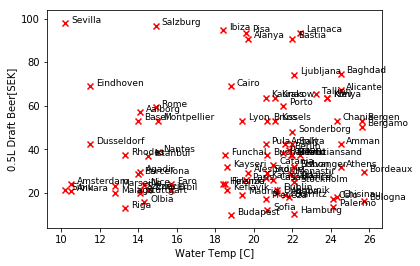

In [17]:
#final.plot.scatter(x = 'Water Temp',y = '0.5L Draft Beer[SEK]',label='City',c = )

for i,type in enumerate(city_june_url['City']):
    x = city_june_url.loc[i,'Water Temp']
    y = city_june_url.loc[i,'0.5L Draft Beer[SEK]']
    plt.scatter(x, y, marker='x', color='red')
    plt.text(x+0.3, y+0.3, type, fontsize=9)
    plt.xlabel('Water Temp [C]')
    plt.ylabel('0.5L Draft Beer[SEK]')
